In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

import random

In [159]:
# Call to data
df_train = pd.read_csv('train.csv')

In [160]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [157]:
df_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Tasks 

- First 2 / 3 task are defined by observing the datafrane and their descirbe (df.Describe())
1. Feature scalling is required on numerical Columns 
2. Item_Identifier 
    - Can make 3 Categories out of it Food , Drink and Non Consumable 
 
3. Item_weight 
    - Missing Values are present needs Imputation of Missing Values 
     

4. Item_fat_content
    - Non consumable Production not have Item Fat so need to make new category like no fat etc
    - Seems Low fat and low fat are same need to replace values and make 3 categories Low Fat , Regular, Other 
   
5. Item_Visibility
    - 0 Item visibiltiy not possible so need to replace value with some other value 
    - Outliers present seems 
    - if visibility range is 0 to 0.1 then we can make two categoreis out of it less Visible and Visible (Not Needed after Checking Multiple Models) 
6. Item_Type
    - 16 Item Types are present need to group somthing like soft drink and hard drink etc into one 
    - 'Household', 'Health and Hygiene', 'Others' should be one category 
7. Item_MRP
    - 
8. Outlet_identifier
    - 10 outlets are there 
    - we can rank outlet according to their sales and replace wih rank. 
    - 
9. Outlet_Establishment_year
    - Compute Age of outlet 
    
10. Outlet _Size 
    - Missing values are present need to impute them 
    - 
11. Outlet_location_type
    - 
12.  Outlet_type
    - 
13. Item_Outlet_sales
    - Check Distribution of this 
    - Target Variable 

In [6]:
# item_identifier 
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x : x[:2])

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

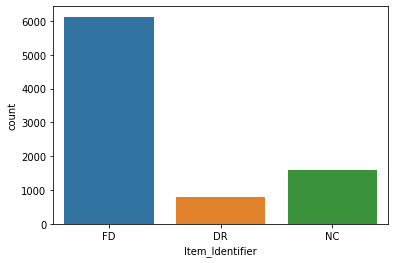

In [7]:
sns.countplot(df_train['Item_Identifier'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

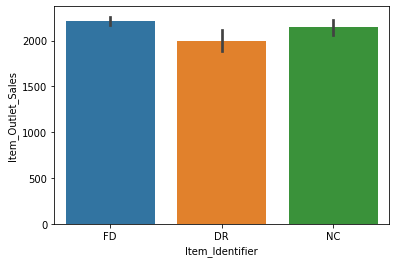

In [8]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

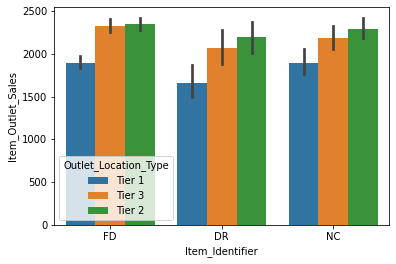

In [9]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

In [10]:
# Item_weight 
df_train['Item_Weight'].isnull().sum() 

1463

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

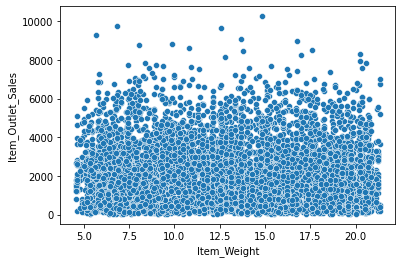

In [11]:
# Imputing Missing Values 
sns.scatterplot(x=df_train['Item_Weight'],y=df_train['Item_Outlet_Sales'])

In [12]:
data = df_train[['Item_Weight']]


imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
new_data = pd.DataFrame(data=new_array,columns=data.columns)

df_train['Item_Weight'] = new_data

In [161]:
# Making groups Low , Medium and high Just to verify
df_train['Item_Weight_category'] = pd.cut(df_train['Item_Weight'],bins=3,labels=['Low','Medium','High'])


<AxesSubplot:xlabel='Item_Weight', ylabel='count'>

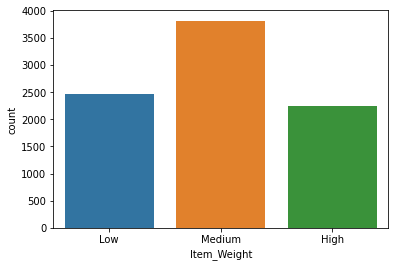

In [15]:
sns.countplot(df_train['Item_Weight_category'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

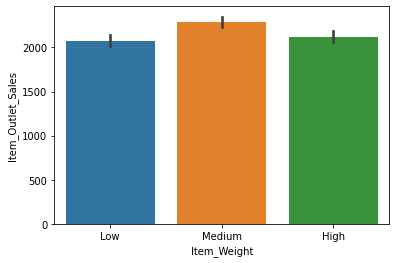

In [16]:
sns.barplot(x=df_train['Item_Weight_category'],y=df_train['Item_Outlet_Sales'])

In [17]:
# Item_fat_content
# Replacing other same categories 
df_train['Item_Fat_Content'].unique()
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])


In [18]:
# replacing non concumable fat content with other category 
df_train.loc[df_train['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non Edible' 
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

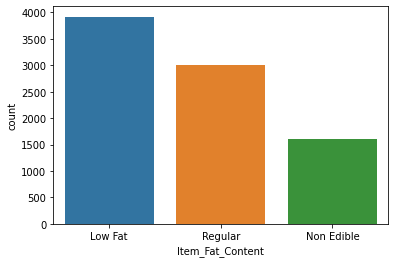

In [19]:
sns.countplot(df_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

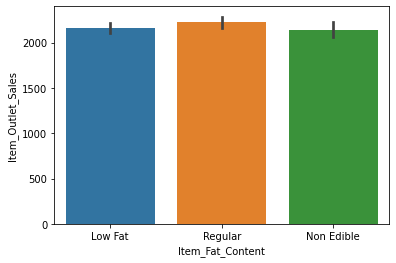

In [20]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

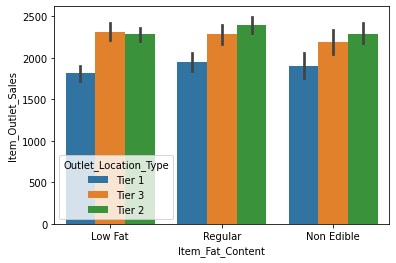

In [21]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

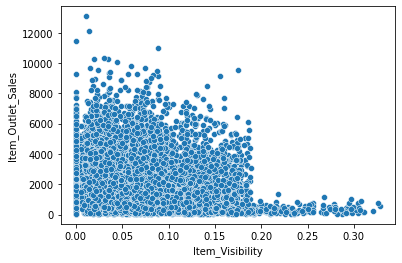

In [22]:
# Item Visibility 
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

In [23]:
# Above diagram shows item with 0 visibilty has more sales but this is not possible at all so will do changes 
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

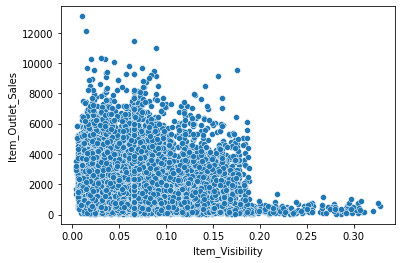

In [24]:
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

In [25]:
# Will make categories of two less visible and more visible 

df_train['Item_Visibility_range'] = pd.cut(df_train['Item_Visibility'],bins=2,labels=['Low','High'])



In [26]:
df_train[df_train['Item_Visibility_range']=='Low'].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8120.000000,8120.000000,8120.000000,8120.000000
mean,0.063705,141.178302,1997.981281,2228.521975
std,0.039003,62.339809,8.345486,1705.954951
min,0.003575,31.290000,1985.000000,33.290000
25%,0.031945,93.845550,1987.000000,892.172000
50%,0.058699,142.812800,1999.000000,1843.933100
75%,0.087463,186.090450,2004.000000,3140.578600
max,0.165838,266.888400,2009.000000,13086.964800


In [27]:
df_train[df_train['Item_Visibility_range']=='High'].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,403.000000,403.000000,403.000000,403.000000
mean,0.201346,137.254768,1994.821340,1229.595475
std,0.039311,60.911287,8.342354,1415.587005
min,0.166033,32.921600,1985.000000,35.287400
25%,0.173581,93.076500,1985.000000,223.043000
50%,0.184035,146.241800,1998.000000,588.567200
75%,0.215860,177.321200,1999.000000,1855.917500
max,0.328391,266.588400,2009.000000,9562.219600


In [28]:
# Item_type

df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [30]:
a = df_train[df_train['Item_Identifier'] == 'FD']
a['Item_Type'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood'], dtype=object)

In [31]:
a = df_train[df_train['Item_Identifier'] == 'DR']
a['Item_Type'].unique()

array(['Soft Drinks', 'Hard Drinks', 'Dairy'], dtype=object)

In [32]:
a = df_train[df_train['Item_Identifier'] == 'NC']
a['Item_Type'].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

In [33]:
# Item MRP 
df_train['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

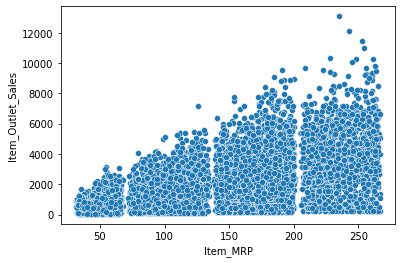

In [34]:
sns.scatterplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])

In [35]:
# Outlet Identifier 
df_train['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

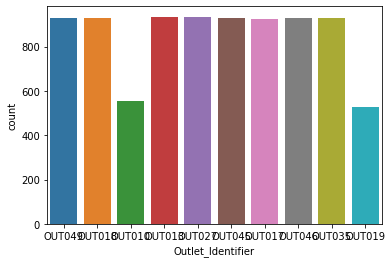

In [36]:
sns.countplot(df_train['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

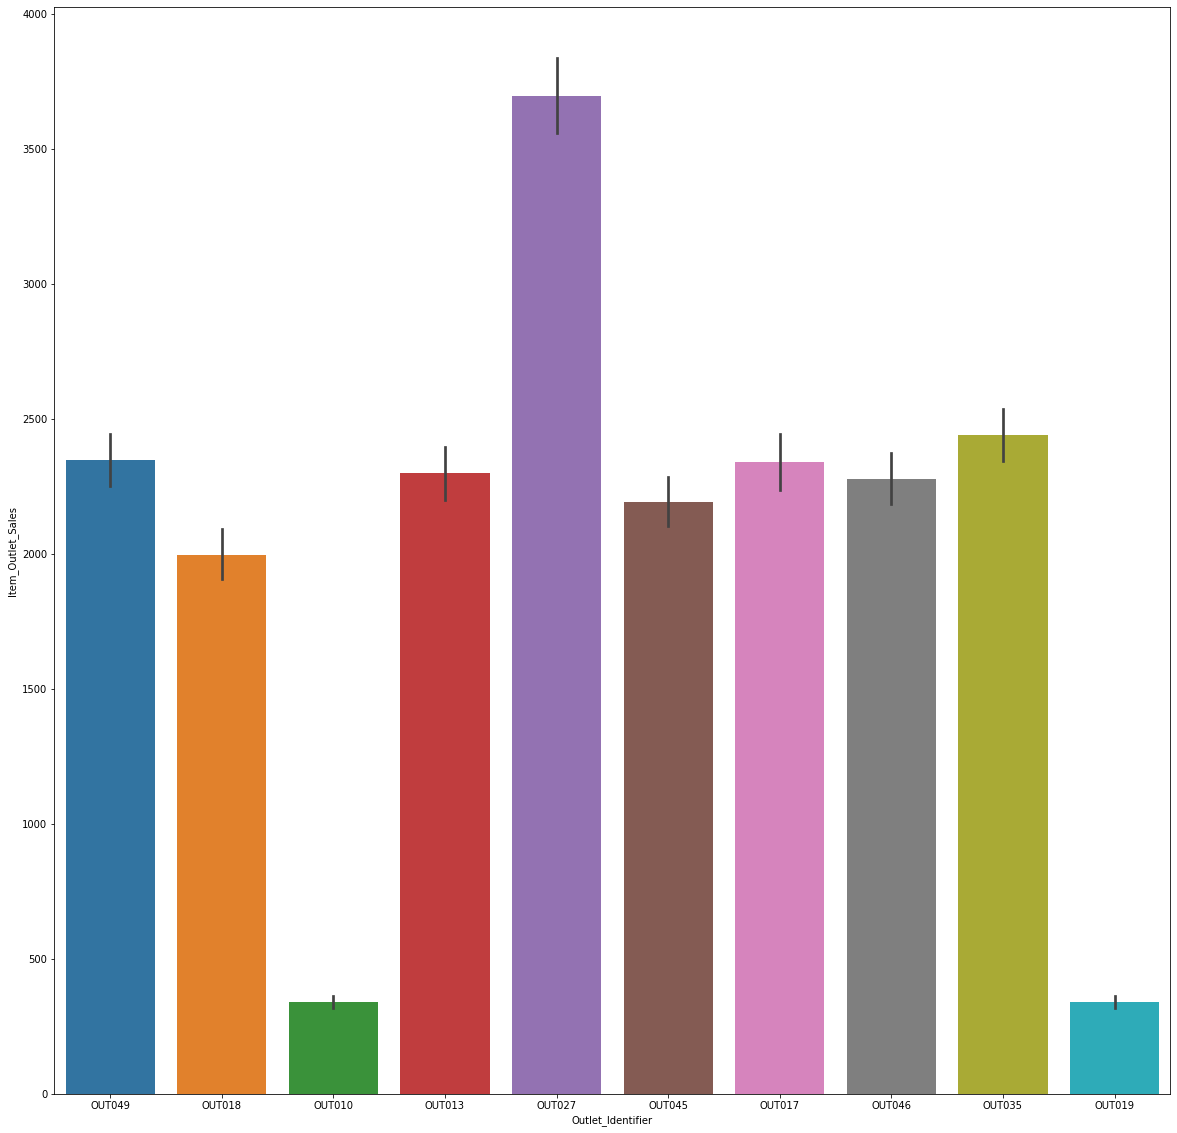

In [37]:
plt.figure(figsize=(20,20))
sns.barplot(x=df_train['Outlet_Identifier'],y=df_train['Item_Outlet_Sales'])

In [38]:
# Outlet Estabolisthment year 
df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda x : 2013 - x)
df_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [39]:
df_train.drop(columns=['Outlet_Identifier'],inplace=True)

<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

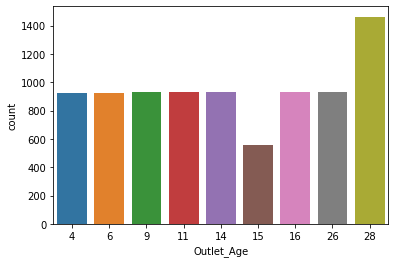

In [40]:
sns.countplot(df_train['Outlet_Age'])

<AxesSubplot:xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

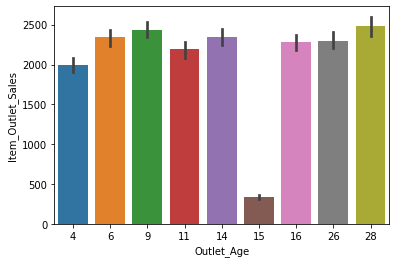

In [41]:
sns.barplot(x=df_train['Outlet_Age'],y=df_train['Item_Outlet_Sales'])

In [42]:
df= df_train[df_train['Outlet_Age']==15]
df['Outlet_Location_Type'].unique()

array(['Tier 3'], dtype=object)

In [162]:
# Outlet _Size 
df_train['Outlet_Size'].isnull().sum()

2410

ValueError: could not convert string to float: 'Medium'

In [44]:
# Imputing with mode 
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

In [45]:
df_train['Outlet_Size'].isnull().sum()

0

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

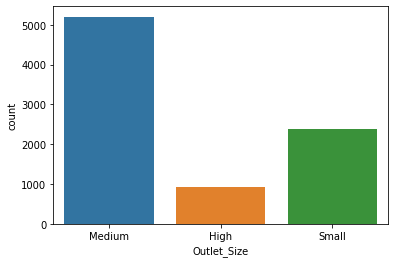

In [46]:
sns.countplot('Outlet_Size',data=df_train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

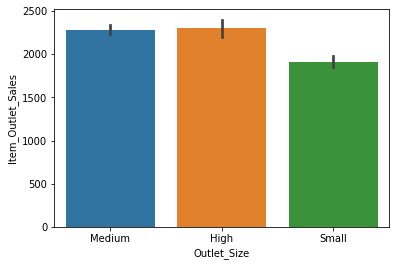

In [47]:
sns.barplot(x=df_train['Outlet_Size'],y=df_train['Item_Outlet_Sales'])

In [48]:
# Outlet_location_type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

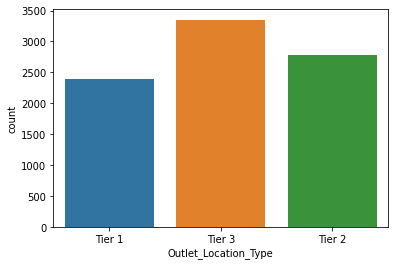

In [49]:

sns.countplot('Outlet_Location_Type',data=df_train)

In [50]:
# Outlet Type 

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

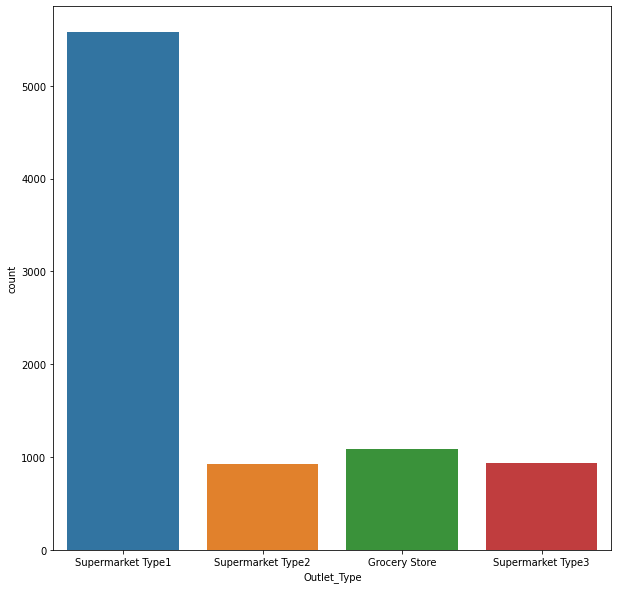

In [51]:

plt.figure(figsize=(10,10))
sns.countplot('Outlet_Type',data=df_train)

# 1.1 Conclusion 
- Total 8523 Entries are there
- Do Univarient , Bivarient , Multivarient Analysis 
- Check Relation with Item Outlet Sales 
- Item_weight Contains Missing Values 
- Scalling is required because numers are in different range 
- Age of outlet can be derived from Outlet Establishment year till 2013 



# Conclusions


2. Item_Identifier 
    - Food items are purchased more than Nonconsumable than Drink 
    - Same pattern observed in item sales prize 
    - Food Items have more weightage than others 
 
3. Item_weight 
    - No relation between this and item_outlet_sales but still will keep this 
    - Items with low weight are in large number 
    - Item with medium wight are purchased more than high and low 

4. Item_fat_content
    - Item with low fat are bought more 
    - sales of all three categories are almost same 
    - 
5. Item_Visibility
    -  Some items are kept such that they may not visible
    - 
6. Item_Type
    - 16 Item Types are present need to group somthing like soft drink and hard drink etc into one 
    - We can drop this because inforamtion already present in Item Identifiers 
7. Item_MRP
    - ITem range with 200 - 250 are sell more 
8. Outlet_identifier
    - Sell from OUT027 are more than others 
    - Out10 and Out19 Present same information we can make it one 
    - We can also delete this because not contributing more to target
    
9. Outlet_Establishment_year
    - Older the outlet sales are more but one isoutleri in this cage whose age is 15 years becayse  it is in tier 3 
    
10. Outlet _Size 
    - The Outlets are more of Medium Size
    - The Outlet Sales is maximum for Medium and High sized Outlets.
    
11. Outlet_location_type
    - Outlets are maximum in tier 3 
12. Outlet_type
    - The Outlets are more of Supermarket Type1.
13. Item_Outlet_sales
    - Check Distribution of this 
    - Target Variable 

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Item_Identifier        8523 non-null   object  
 1   Item_Weight            8523 non-null   category
 2   Item_Fat_Content       8523 non-null   object  
 3   Item_Type              8523 non-null   object  
 4   Item_MRP               8523 non-null   float64 
 5   Outlet_Identifier      8523 non-null   object  
 6   Outlet_Size            8523 non-null   object  
 7   Outlet_Location_Type   8523 non-null   object  
 8   Outlet_Type            8523 non-null   object  
 9   Item_Outlet_Sales      8523 non-null   float64 
 10  Item_Visibility_range  8523 non-null   category
 11  Outlet_Age             8523 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(7)
memory usage: 682.8+ KB


# Feature Engineering and scaling 
data = df_train

In [53]:
data = df_train.copy(deep=True)

In [54]:
data.drop(columns='Item_Type',inplace=True)

In [55]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_range,Outlet_Age
0,FD,Low,Low Fat,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Low,14
1,DR,Low,Regular,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Low,4
2,FD,High,Low Fat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Low,14
3,FD,High,Regular,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Low,15
4,NC,Low,Non Edible,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Low,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,Low,Low Fat,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Low,26
8519,FD,Low,Regular,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,Low,11
8520,NC,Medium,Non Edible,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Low,9
8521,FD,Low,Regular,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Low,4


In [56]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_range,Outlet_Age
0,FD,Low,Low Fat,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Low,14
1,DR,Low,Regular,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Low,4
2,FD,High,Low Fat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Low,14
3,FD,High,Regular,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Low,15
4,NC,Low,Non Edible,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Low,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,Low,Low Fat,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Low,26
8519,FD,Low,Regular,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,Low,11
8520,NC,Medium,Non Edible,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Low,9
8521,FD,Low,Regular,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Low,4


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Item_Identifier        8523 non-null   object  
 1   Item_Weight            8523 non-null   category
 2   Item_Fat_Content       8523 non-null   object  
 3   Item_MRP               8523 non-null   float64 
 4   Outlet_Identifier      8523 non-null   object  
 5   Outlet_Size            8523 non-null   object  
 6   Outlet_Location_Type   8523 non-null   object  
 7   Outlet_Type            8523 non-null   object  
 8   Item_Outlet_Sales      8523 non-null   float64 
 9   Item_Visibility_range  8523 non-null   category
 10  Outlet_Age             8523 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(6)
memory usage: 616.2+ KB


In [58]:
# for scaling and Encoding We are dividing 
num = []
cat = []

for i in data.columns:
    if data[i].dtypes == 'category' or data[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)

# Check 

1. By doing Encoding on Cat and scaling on Num check scores 
2. Encode cat and scale both then check scores 
3. One hot encoding the cat 

# Case 1 

data_1 = data.copy(deep=true)

In [59]:
data_1 = data.copy(deep=True)

In [60]:
cat_encoding = data_1[cat]
cat_encoding

,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,FD,Low,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Low
1,DR,Low,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Low
2,FD,High,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Low
3,FD,High,Regular,OUT010,Medium,Tier 3,Grocery Store,Low
4,NC,Low,Non Edible,OUT013,High,Tier 3,Supermarket Type1,Low
...,...,...,...,...,...,...,...,...
8518,FD,Low,Low Fat,OUT013,High,Tier 3,Supermarket Type1,Low
8519,FD,Low,Regular,OUT045,Medium,Tier 2,Supermarket Type1,Low
8520,NC,Medium,Non Edible,OUT035,Small,Tier 2,Supermarket Type1,Low
8521,FD,Low,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Low


In [61]:
# Encoding 
encoder = LabelEncoder()
features = ['Item_Identifier','Item_Weight','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Visibility_range','Outlet_Identifier']

for i in features:
    cat_encoding[i] = encoder.fit_transform(cat_encoding[i])

In [62]:
# scaling to num 

In [63]:
num_df = data_1[num]
num_df

,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,249.8092,3735.1380,14
1,48.2692,443.4228,4
2,141.6180,2097.2700,14
3,182.0950,732.3800,15
4,53.8614,994.7052,26
...,...,...,...
8518,214.5218,2778.3834,26
8519,108.1570,549.2850,11
8520,85.1224,1193.1136,9
8521,103.1332,1845.5976,4


In [64]:
num_df = data_1[num]
scaler = StandardScaler()
num_array = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_array,columns=num_df.columns)

In [65]:
num_df

,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,1.747454,0.910601,-0.139541
1,-1.489023,-1.018440,-1.334103
2,0.010040,-0.049238,-0.139541
3,0.660050,-0.849103,-0.020085
4,-1.399220,-0.695373,1.293934
...,...,...,...
8518,1.180783,0.349915,1.293934
8519,-0.527301,-0.956402,-0.497909
8520,-0.897208,-0.579100,-0.736822
8521,-0.607977,-0.196725,-1.334103


In [66]:
data_1 = pd.concat([num_df,cat_encoding],axis=1)
data_1

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,1.747454,0.910601,-0.139541,1,1,0,9,1,0,1,1
1,-1.489023,-1.018440,-1.334103,0,1,2,3,1,2,2,1
2,0.010040,-0.049238,-0.139541,1,0,0,9,1,0,1,1
3,0.660050,-0.849103,-0.020085,1,0,2,0,1,2,0,1
4,-1.399220,-0.695373,1.293934,2,1,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,1,1,0,1,0,2,1,1
8519,-0.527301,-0.956402,-0.497909,1,1,2,7,1,1,1,1
8520,-0.897208,-0.579100,-0.736822,2,2,1,6,2,1,1,1
8521,-0.607977,-0.196725,-1.334103,1,1,2,3,1,2,2,1


# Case 2 : 
Encode cat and scale both then check scores

In [67]:
data_2 = data.copy(deep=True)

In [68]:
cat_2= data_2[cat]
# Encoding 
encoder = LabelEncoder()
features = ['Item_Identifier','Item_Weight','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Visibility_range','Outlet_Identifier']

for i in features:
    cat_2[i] = encoder.fit_transform(cat_2[i])

In [69]:
num_df = data_2[num]
num_df

,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,249.8092,3735.1380,14
1,48.2692,443.4228,4
2,141.6180,2097.2700,14
3,182.0950,732.3800,15
4,53.8614,994.7052,26
...,...,...,...
8518,214.5218,2778.3834,26
8519,108.1570,549.2850,11
8520,85.1224,1193.1136,9
8521,103.1332,1845.5976,4


In [70]:
data_2 = pd.concat([num_df,cat_2],axis=1)
data_2

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,249.8092,3735.1380,14,1,1,0,9,1,0,1,1
1,48.2692,443.4228,4,0,1,2,3,1,2,2,1
2,141.6180,2097.2700,14,1,0,0,9,1,0,1,1
3,182.0950,732.3800,15,1,0,2,0,1,2,0,1
4,53.8614,994.7052,26,2,1,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,2778.3834,26,1,1,0,1,0,2,1,1
8519,108.1570,549.2850,11,1,1,2,7,1,1,1,1
8520,85.1224,1193.1136,9,2,2,1,6,2,1,1,1
8521,103.1332,1845.5976,4,1,1,2,3,1,2,2,1


In [71]:
num_df = data_2
scaler = StandardScaler()
num_array = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_array,columns=num_df.columns)

In [72]:
data_2 = num_df.copy(deep=True)

In [73]:
data_2

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,1.747454,0.910601,-0.139541,-0.179795,-0.224034,-0.997813,1.507813,-0.284581,-1.369334,-0.252658,0.222779
1,-1.489023,-1.018440,-1.334103,-2.095286,-0.224034,1.236942,-0.607071,-0.284581,1.091569,1.002972,0.222779
2,0.010040,-0.049238,-0.139541,-0.179795,-1.439464,-0.997813,1.507813,-0.284581,-1.369334,-0.252658,0.222779
3,0.660050,-0.849103,-0.020085,-0.179795,-1.439464,1.236942,-1.664513,-0.284581,1.091569,-1.508289,0.222779
4,-1.399220,-0.695373,1.293934,1.735696,-0.224034,0.119565,-1.312032,-1.950437,1.091569,-0.252658,0.222779
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,-0.179795,-0.224034,-0.997813,-1.312032,-1.950437,1.091569,-0.252658,0.222779
8519,-0.527301,-0.956402,-0.497909,-0.179795,-0.224034,1.236942,0.802852,-0.284581,-0.138882,-0.252658,0.222779
8520,-0.897208,-0.579100,-0.736822,1.735696,0.991396,0.119565,0.450371,1.381274,-0.138882,-0.252658,0.222779
8521,-0.607977,-0.196725,-1.334103,-0.179795,-0.224034,1.236942,-0.607071,-0.284581,1.091569,1.002972,0.222779


Case 3 : 
One hot encoding the cat

In [74]:
data_3 = data.copy(deep=True)
cat_3 = data_3[cat]

In [75]:
cat_3

,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,FD,Low,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Low
1,DR,Low,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Low
2,FD,High,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Low
3,FD,High,Regular,OUT010,Medium,Tier 3,Grocery Store,Low
4,NC,Low,Non Edible,OUT013,High,Tier 3,Supermarket Type1,Low
...,...,...,...,...,...,...,...,...
8518,FD,Low,Low Fat,OUT013,High,Tier 3,Supermarket Type1,Low
8519,FD,Low,Regular,OUT045,Medium,Tier 2,Supermarket Type1,Low
8520,NC,Medium,Non Edible,OUT035,Small,Tier 2,Supermarket Type1,Low
8521,FD,Low,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Low


In [76]:

onehot_enc=OneHotEncoder(drop="first", sparse=False)
enc_array=onehot_enc.fit_transform(cat_3)

In [77]:
enc_df=pd.DataFrame(enc_array, columns=onehot_enc.get_feature_names_out())
enc_df

,Item_Identifier_FD,Item_Identifier_NC,Item_Weight_Low,Item_Weight_Medium,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_range_Low
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8519,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8520,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8521,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [78]:
num_df = data_3[num]
scaler = StandardScaler()
num_array = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_array,columns=num_df.columns)

In [79]:
num_df

,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,1.747454,0.910601,-0.139541
1,-1.489023,-1.018440,-1.334103
2,0.010040,-0.049238,-0.139541
3,0.660050,-0.849103,-0.020085
4,-1.399220,-0.695373,1.293934
...,...,...,...
8518,1.180783,0.349915,1.293934
8519,-0.527301,-0.956402,-0.497909
8520,-0.897208,-0.579100,-0.736822
8521,-0.607977,-0.196725,-1.334103


In [80]:
data_3 = pd.concat([num_df,enc_df],axis=1)
data_3

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Weight_Low,Item_Weight_Medium,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_range_Low
0,1.747454,0.910601,-0.139541,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.489023,-1.018440,-1.334103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.010040,-0.049238,-0.139541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.660050,-0.849103,-0.020085,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.399220,-0.695373,1.293934,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8519,-0.527301,-0.956402,-0.497909,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8520,-0.897208,-0.579100,-0.736822,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8521,-0.607977,-0.196725,-1.334103,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [81]:
data_1

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,1.747454,0.910601,-0.139541,1,1,0,9,1,0,1,1
1,-1.489023,-1.018440,-1.334103,0,1,2,3,1,2,2,1
2,0.010040,-0.049238,-0.139541,1,0,0,9,1,0,1,1
3,0.660050,-0.849103,-0.020085,1,0,2,0,1,2,0,1
4,-1.399220,-0.695373,1.293934,2,1,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,1,1,0,1,0,2,1,1
8519,-0.527301,-0.956402,-0.497909,1,1,2,7,1,1,1,1
8520,-0.897208,-0.579100,-0.736822,2,2,1,6,2,1,1,1
8521,-0.607977,-0.196725,-1.334103,1,1,2,3,1,2,2,1


In [82]:
data_2

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Item_Weight,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_range
0,1.747454,0.910601,-0.139541,-0.179795,-0.224034,-0.997813,1.507813,-0.284581,-1.369334,-0.252658,0.222779
1,-1.489023,-1.018440,-1.334103,-2.095286,-0.224034,1.236942,-0.607071,-0.284581,1.091569,1.002972,0.222779
2,0.010040,-0.049238,-0.139541,-0.179795,-1.439464,-0.997813,1.507813,-0.284581,-1.369334,-0.252658,0.222779
3,0.660050,-0.849103,-0.020085,-0.179795,-1.439464,1.236942,-1.664513,-0.284581,1.091569,-1.508289,0.222779
4,-1.399220,-0.695373,1.293934,1.735696,-0.224034,0.119565,-1.312032,-1.950437,1.091569,-0.252658,0.222779
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,-0.179795,-0.224034,-0.997813,-1.312032,-1.950437,1.091569,-0.252658,0.222779
8519,-0.527301,-0.956402,-0.497909,-0.179795,-0.224034,1.236942,0.802852,-0.284581,-0.138882,-0.252658,0.222779
8520,-0.897208,-0.579100,-0.736822,1.735696,0.991396,0.119565,0.450371,1.381274,-0.138882,-0.252658,0.222779
8521,-0.607977,-0.196725,-1.334103,-0.179795,-0.224034,1.236942,-0.607071,-0.284581,1.091569,1.002972,0.222779


In [140]:
data_3

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Weight_Low,Item_Weight_Medium,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_range_Low
0,1.747454,3735.1380,-0.139541,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.489023,443.4228,-1.334103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.010040,2097.2700,-0.139541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.660050,732.3800,-0.020085,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.399220,994.7052,1.293934,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,2778.3834,1.293934,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8519,-0.527301,549.2850,-0.497909,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8520,-0.897208,1193.1136,-0.736822,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8521,-0.607977,1845.5976,-1.334103,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Checking on Previous Data and Data_3

In [142]:
# Checking for Linear Regression 

In [143]:
data_3
X = data_3.drop(columns=['Item_Outlet_Sales'])
y = data_3['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print(f'Shape of data:{data_3.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 26)
Shape of X_train:(6818, 25)
Shape of y_train:(6818,)
Shape of X_test:(1705, 25)
Shape of y_test:(1705,)
accuracy 0.5438377328797414


In [144]:
data_other

X = data_other.drop(columns=['Item_Outlet_Sales'])
y = data_other['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_other.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 10)
Shape of X_train:(6818, 9)
Shape of y_train:(6818,)
Shape of X_test:(1705, 9)
Shape of y_test:(1705,)
accuracy 0.49512363682493754


In [150]:
data_1
X = data_1.drop(columns=['Item_Outlet_Sales'])
y = data_1['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_1.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 11)
Shape of X_train:(6818, 10)
Shape of y_train:(6818,)
Shape of X_test:(1705, 10)
Shape of y_test:(1705,)
accuracy 0.4980104168291606


In [132]:
data_3

,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Weight_Low,Item_Weight_Medium,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_range_Low
0,1.747454,0.910601,-0.139541,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.489023,-1.018440,-1.334103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.010040,-0.049238,-0.139541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.660050,-0.849103,-0.020085,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.399220,-0.695373,1.293934,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.180783,0.349915,1.293934,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8519,-0.527301,-0.956402,-0.497909,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8520,-0.897208,-0.579100,-0.736822,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8521,-0.607977,-0.196725,-1.334103,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [109]:
# Checking for Random Forest

In [145]:
data_3
X = data_3.drop(columns=['Item_Outlet_Sales'])
y = data_3['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print(f'Shape of data:{data_3.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 26)
Shape of X_train:(6818, 25)
Shape of y_train:(6818,)
Shape of X_test:(1705, 25)
Shape of y_test:(1705,)
accuracy 0.4765542923646222


In [146]:
data_other

X = data_other.drop(columns=['Item_Outlet_Sales'])
y = data_other['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_other.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 10)
Shape of X_train:(6818, 9)
Shape of y_train:(6818,)
Shape of X_test:(1705, 9)
Shape of y_test:(1705,)
accuracy 0.5602009993817914


In [151]:
data_1
X = data_1.drop(columns=['Item_Outlet_Sales'])
y = data_1['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_1.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 11)
Shape of X_train:(6818, 10)
Shape of y_train:(6818,)
Shape of X_test:(1705, 10)
Shape of y_test:(1705,)
accuracy 0.47667864985503783


In [110]:
# checking for XGBoost 

In [147]:
data_3
X = data_3.drop(columns=['Item_Outlet_Sales'])
y = data_3['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print(f'Shape of data:{data_3.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
XB = XGBRegressor()
XB.fit(X_train,y_train)
y_pred = XB.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 26)
Shape of X_train:(6818, 25)
Shape of y_train:(6818,)
Shape of X_test:(1705, 25)
Shape of y_test:(1705,)
accuracy 0.506094534770661


In [148]:
data_other

X = data_other.drop(columns=['Item_Outlet_Sales'])
y = data_other['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_other.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
XB = XGBRegressor()
XB.fit(X_train,y_train)
y_pred = XB.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 10)
Shape of X_train:(6818, 9)
Shape of y_train:(6818,)
Shape of X_test:(1705, 9)
Shape of y_test:(1705,)
accuracy 0.5280912391768585


In [152]:
data_1
X = data_1.drop(columns=['Item_Outlet_Sales'])
y = data_1['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

print(f'Shape of data:{data_1.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')
XB = XGBRegressor()
XB.fit(X_train,y_train)
y_pred = XB.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

Shape of data:(8523, 11)
Shape of X_train:(6818, 10)
Shape of y_train:(6818,)
Shape of X_test:(1705, 10)
Shape of y_test:(1705,)
accuracy 0.4982438240915126
